In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Fake data

In [111]:
xt = lambda t: np.cos(t) + (np.random.randn(1) if np.random.randn(1) > .6 else 0)

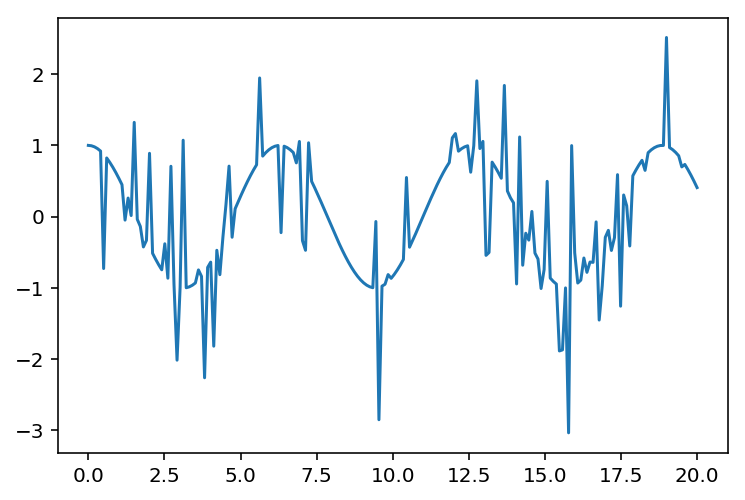

In [112]:
t = np.linspace(0, 20, 200)
x = np.hstack([xt(ti) for ti in t])
plt.plot(t, x)

# Model

Perception: 
$$f_i(x_j) = 
\begin{cases}
      <x_j>_{\tau} & | x_j | < c_{ij} \\
      & and \ | <x_j>_{\tau} | < c^*_{ij} \\
      x_j & else \\
\end{cases}
$$

$$c_{ij} = \alpha_{i} var(x_{j})_{\tau} + \beta_{i} |<x_j>_{\tau}|$$

$$c^*_{ij} = \frac{c^*_{ij}}{2}$$

In [113]:
tau = 5
a = 1
b = 1

In [114]:
import pandas as pd
xts = pd.Series(x)
mean = xts.rolling(window = tau).mean().values
mean = np.nan_to_num(mean)
var = xts.rolling(window = tau).var().values
var = np.nan_to_num(var)

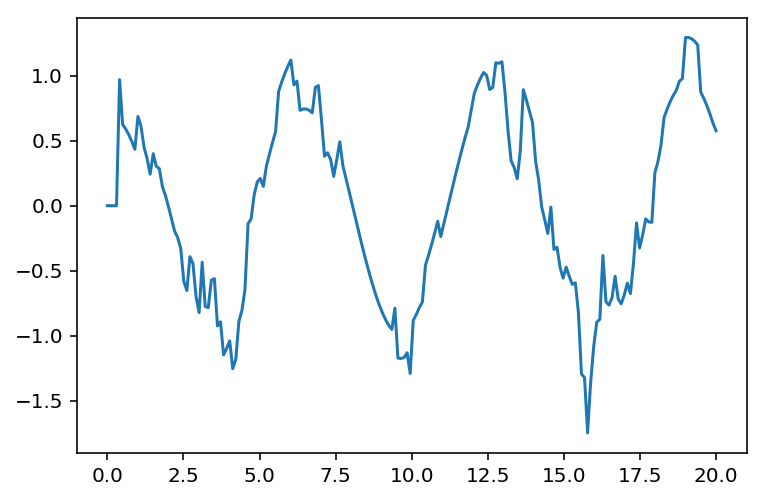

In [115]:
plt.plot(t, mean)

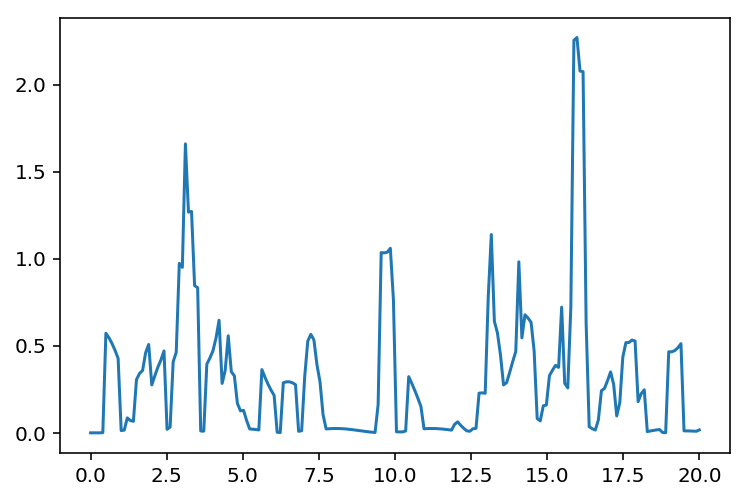

In [116]:
plt.plot(t, var)

In [117]:
c = a * np.sqrt(var) + b * np.abs(mean)
cstar = 10

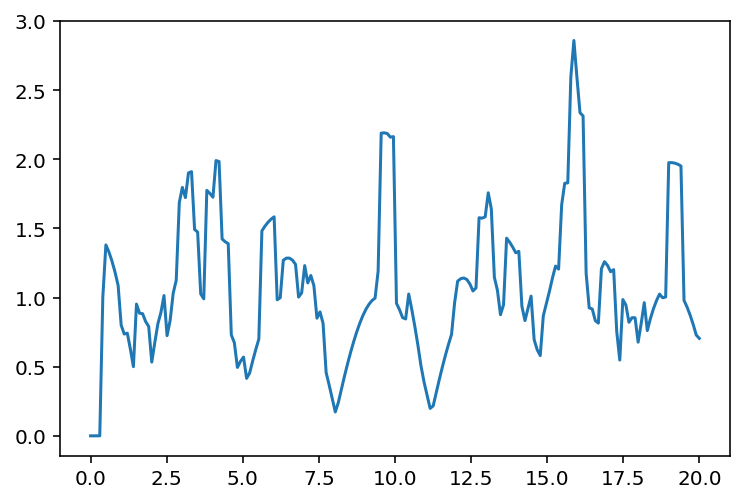

In [118]:
plt.plot(t, c)

In [119]:
fx = np.empty_like(x)
fx[np.abs(x) < c] =  mean[np.abs(x) < c]
fx[np.abs(mean) < cstar] =  mean[np.abs(mean) < cstar]
fx[np.abs(x) >= c] = x[np.abs(x) >= c]

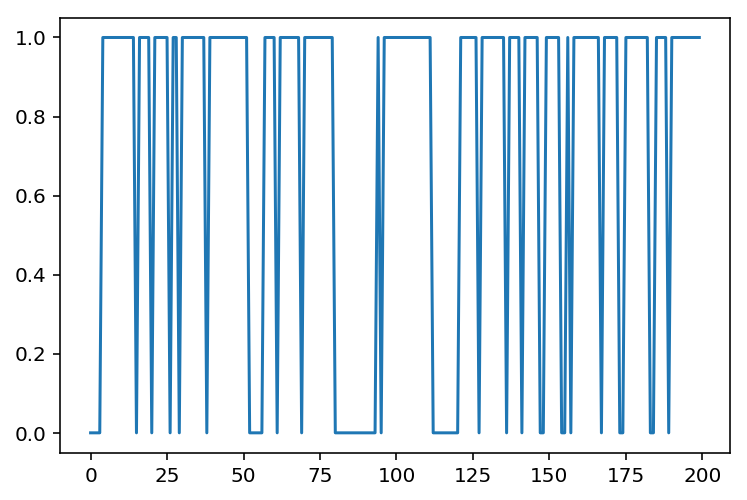

In [120]:
plt.plot(np.abs(x) < c)

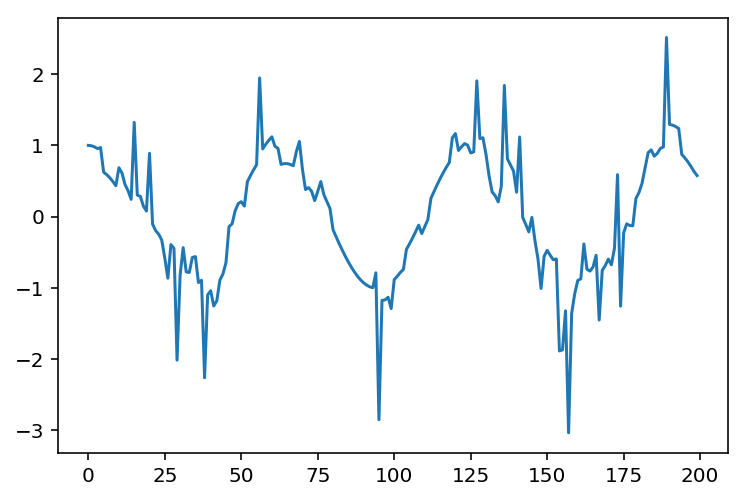

In [121]:
plt.plot(fx)

# Different values for a

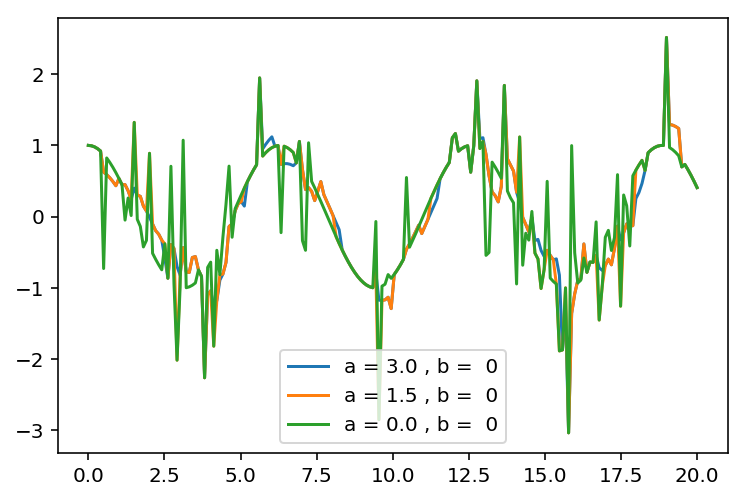

In [122]:
b = 0
for a in np.linspace(3, 0, 3):
    c = a * np.sqrt(var) + b * np.abs(mean)
    cstar = 10
    fx = np.copy(x)
    fx[np.abs(x) < c] =  mean[np.abs(x) < c]
    fx[np.abs(mean) < cstar] =  mean[np.abs(mean) < cstar]
    fx[np.abs(x) >= c] = x[np.abs(x) >= c]
    plt.plot(t, fx, label = 'a = %s , b =  %s' %(a, b))
# plt.plot(t,x, label= 'x')
plt.legend()

# Different values for gamma

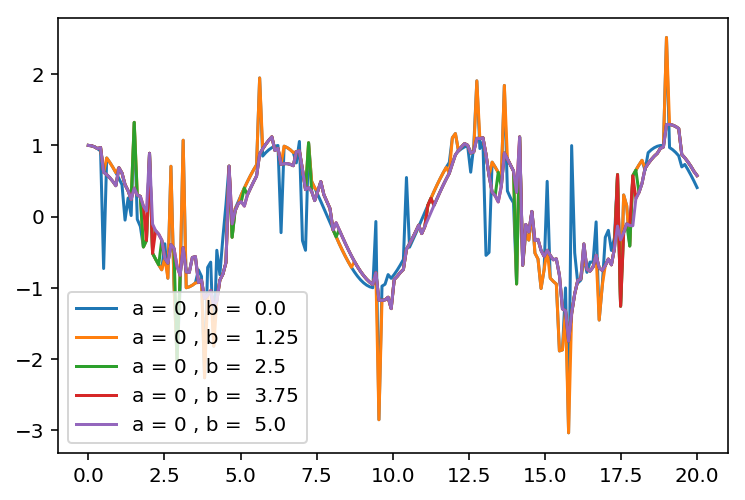

In [123]:
a = 0
for b in np.linspace(0, 5, 5):
    c = a * np.sqrt(var) + b * np.abs(mean)
    cstar = 10
    fx = np.copy(x)
    fx[np.abs(x) < c] =  mean[np.abs(x) < c]
    fx[np.abs(mean) < cstar] =  mean[np.abs(mean) < cstar]
    fx[np.abs(x) >= c] = x[np.abs(x) >= c]
    plt.plot(t, fx, label = 'a = %s , b =  %s' %(a, b))
plt.legend()

Bigger the gamma, bigger the fluctuations detected

# Both

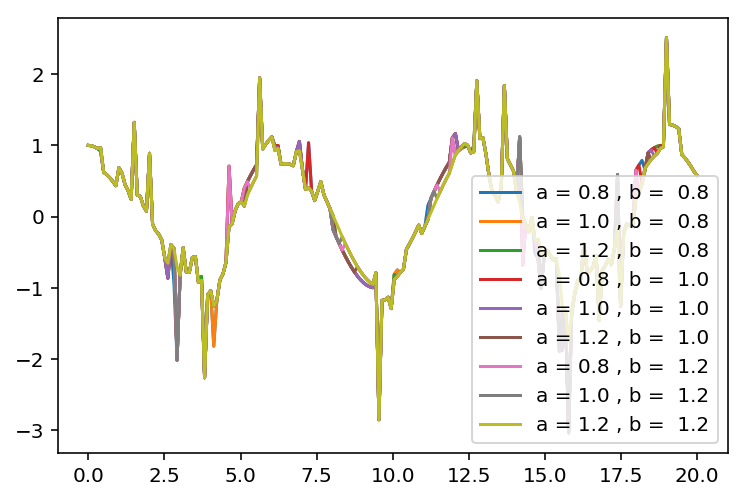

In [124]:
import itertools
for b, a in itertools.product(np.linspace(.8, 1.2, 3),np.linspace(.8, 1.2, 3)):
    c = a * np.sqrt(var) + b * np.abs(mean)
    cstar = 10
    fx = np.copy(x)
    fx[np.abs(x) < c] =  mean[np.abs(x) < c]
    fx[np.abs(mean) < cstar] =  mean[np.abs(mean) < cstar]
    fx[np.abs(x) >= c] = x[np.abs(x) >= c]
    plt.plot(t, fx, label = 'a = %s , b =  %s' %(a, b))
plt.legend()